# Построение и оценка модели

**Вариант 1**

ЗАДАНИЕ 1 

Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

import os

C:\Users\Windows\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

In [3]:
data_w = data.copy().resample('W').mean()

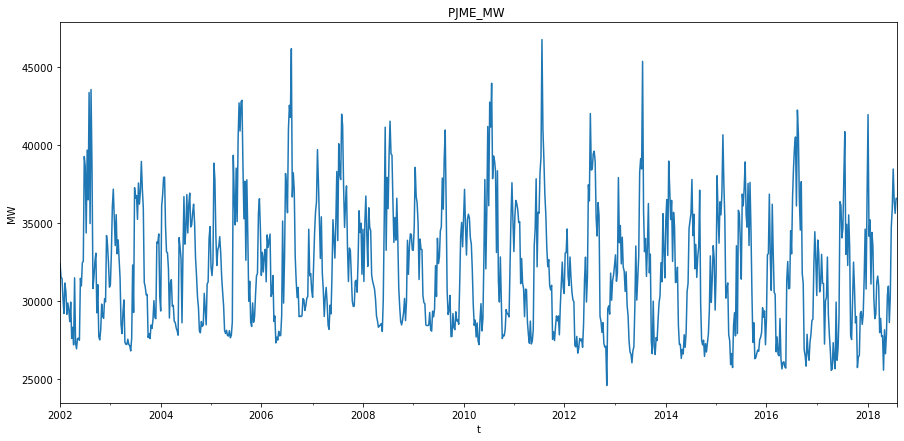

In [4]:
_ = data_w['PJME_MW'].plot( style='-', figsize=( 15, 7 ), title='PJME_MW ')
plt.ylabel('MW')
plt.xlabel('t')
plt.show()

In [5]:
data_w[data_w['PJME_MW'].isnull()].count()

PJME_MW            0
year               0
month              0
dayofmonth         0
quarter            0
dayofyear          0
weekofyear         0
dayofweek          0
hour               0
is_holiday         0
is_prev_holiday    0
is_next_holiday    0
dtype: int64

Пропусков нет

In [6]:
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


ЗАДАНИЕ 3

Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

**1. Удаление лишних столбцов ряда**

In [7]:
#Удалим данные о часах, т.к. они потеряли актуальность
data_w.drop('hour', axis=1,inplace=True)
#Поскольку в годовом развороте ряда тренда нет (временные ряды 2 и 3), то признак 'year' можно исключить.
data_w.drop('year', axis=1,inplace=True)
data_w.head()

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,3.517483,0.160839,0.000000,0.167832
2002-01-13,31487.386905,1.000000,10.000000,1.0,10.000000,2.0,3.000000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,1.000000,17.000000,1.0,17.000000,3.0,3.000000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,3.000000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,1.428571,17.714286,1.0,31.000000,5.0,3.000000,0.000000,0.000000,0.000000


**2. Генерация признаков**

Построим интегральный признак используя кластер-анализ или частичную классификацию. Начнем с признака по кластер-анализу. Воспользуемся методом kmeans, если можем предположить сколько будет кластеров, или DBSCAN, который не требует знания реального числа кластеров. 
В данном случае воспользуемся DBSCAN.

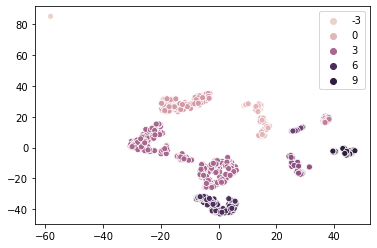

In [8]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_w.iloc[:,:-1].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)

clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()


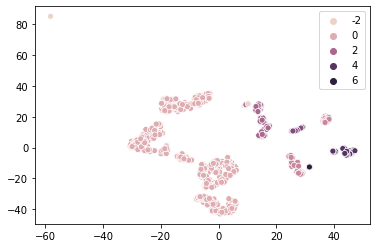

In [9]:
sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_scale_clast )
plt.show()

In [10]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  7
Число кластеров в календаре:  9


В данном конкретном примере кластеризация без масштабирования, но с понижением размерности выглядит очень обосновано. Берем этот вариант за основу и добавим признак к общему описанию задачи. 

In [11]:
data_w['week_month'] = X_clast
data_w.iloc[np.where(data_w['week_month']==0)[0]].iloc[:10,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,week_month
Date,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,3.517483,0.160839,0.0,0.167832,0
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,3.000000,0.142857,0.0,0.142857,0
2002-02-24,29144.130952,2.000000,21.000000,1.0,52.000000,8.0,3.000000,0.142857,0.0,0.142857,0
2002-06-02,31448.660714,5.285714,21.142857,2.0,150.000000,22.0,3.000000,0.142857,0.0,0.142857,0
2002-09-08,31535.172619,9.000000,5.000000,3.0,248.000000,36.0,3.000000,0.142857,0.0,0.142857,0
2002-10-20,27504.827381,10.000000,17.000000,4.0,290.000000,42.0,3.000000,0.142857,0.0,0.142857,0
2002-11-17,28881.886905,11.000000,14.000000,4.0,318.000000,46.0,3.000000,0.142857,0.0,0.142857,0
2003-01-26,37169.547619,1.000000,23.000000,1.0,23.000000,4.0,3.000000,0.142857,0.0,0.142857,0
2003-02-23,33023.458333,2.000000,20.000000,1.0,51.000000,8.0,3.000000,0.142857,0.0,0.142857,0


 Добавим признак на основе компонетного анализа. Построим 4 компоненты по признакам из календаря , без значений ряда и допишем их в общую таблицу data_d.


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
Xpca.shape

(866, 4)

In [13]:
data_w['pca1']=Xpca[:,0]
data_w['pca2']=Xpca[:,1]
data_w['pca3']=Xpca[:,2]
data_w['pca4']=Xpca[:,3]

Добавим новых признаков, описывающих содержание ряда. К таким признакам можно отнести разности ряда и разнообразные варианты сглаживания. Добавим к нашей модели 1-е разности. При этом следует помнить, что такие операции уменьшают общую длину корректной выборки на 1, т.е. первую строку данных следует исключить из модели в момент обучения.
Также можно добавить все, что можем придумать. Например, логарифм признака, частные признаков , частные логарифмов и т.д. 

In [14]:
first_diff =np.array(data_w.iloc[1:,0].values - data_w.iloc[:-1,0].values).astype('float32') 
data_w['diff1'] = 0
data_w['diff1'] =  data_w['diff1'].astype('float') 
data_w['diff1'].values[1:] = first_diff

first_diff_d =(first_diff) / data_w.iloc[1:,0].values
data_w['diff1_d'] = 0
data_w['diff1_d'] =  data_w['diff1_d'].astype('float') 
data_w['diff1_d'].values[1:] = np.array(first_diff_d).astype('float32')

 Бокс-Кокс преобразование тут не работает, т.к. дисперсия постоянна - нет смысла.
 
 Создаем признак по логарифму

In [15]:
first_diff_l =np.log(data_w.iloc[1:,0].values) 
data_w['diff1_l'] = 0
data_w['diff1_l'] =  data_w['diff1_l'].astype('float') 
data_w['diff1_l'].values[1:] = first_diff_l

Добавим скользящее среднее по всей модели с глубиной 13 недели. Размер окна определен длиной месячных циклов.

In [16]:
data_w['d_w13']=data_w['PJME_MW'].rolling(window=13).mean()

А теперь добавим еще и экспонентциальную среднюю. Медленную, т.к. интересная информация лежит на уровне сезонных колебаний цены.

In [17]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_0_5'] = exponential_smoothing(data_w['PJME_MW'], 0.5)

In [18]:
#Итоговые данные
data_w.iloc[10:15,:]

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,week_month,pca1,pca2,pca3,pca4,diff1,diff1_d,diff1_l,d_w13,exp_0_5
Date,,,,,,,,,,,,,,,,,,,,
2002-03-17,28672.779762,3.0,14.000000,1.0,73.000000,11.0,3.000000,0.0,0.0,0.0,1,-2.283898,0.420823,-0.133131,0.022987,-768.130981,-0.026790,10.263704,NaN,29164.898438
2002-03-24,29927.488095,3.0,21.000000,1.0,80.000000,12.0,3.000000,0.0,0.0,0.0,1,-2.181299,0.324182,0.644737,-0.635561,1254.708374,0.041925,10.306533,NaN,29546.193266
2002-03-31,27595.869048,3.0,28.000000,1.0,87.000000,13.0,3.000000,0.0,0.0,0.0,1,-2.078700,0.227541,1.422605,-1.294109,-2331.619141,-0.084492,10.225421,30083.670797,28571.031157
2002-04-07,28308.778443,4.0,3.982036,2.0,93.982036,14.0,2.982036,0.0,0.0,0.0,3,-1.534367,0.724047,-1.083496,1.217573,712.909424,0.025183,10.250927,29769.564459,28439.904800
2002-04-14,27182.482143,4.0,11.000000,2.0,101.000000,15.0,3.000000,0.0,0.0,0.0,3,-1.436971,0.563263,-0.520395,0.307963,-1126.296265,-0.041435,10.210328,29438.417939,27811.193471


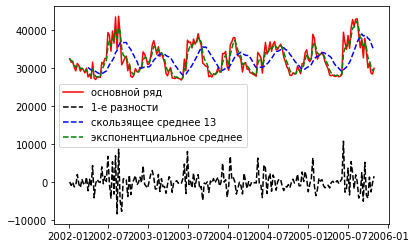

In [19]:
N100=200
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_w.index[:N100],data_w['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_w.index[:N100],data_w['d_w13'][:N100],'--b',label ='скользящее среднее 13')
plt.plot(data_w.index[:N100],data_w['exp_0_5'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()

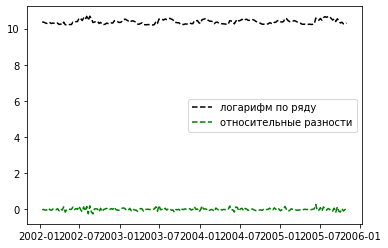

In [20]:
N100=200
plt.plot(data_w.index[1:N100],data_w['diff1_l'][1:N100],'--k',label ='логарифм по ряду')
plt.plot(data_w.index[1:N100],data_w['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

Период сезонных колебаний 13 недель и недельный цикл по дням. Это позволит не строить все возможные сочетания параметров модели, а сократить их число до относительно небольшого подмножества. Посмотрим на примере экспоненциальных средних в диапазоне alpha = [0.3, 0.8] 

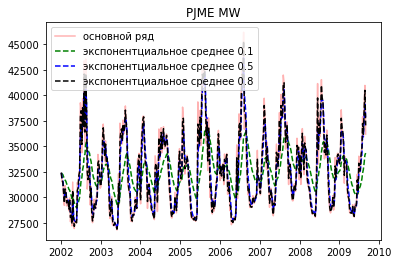

In [21]:
data_w['exp_0_1'] = exponential_smoothing(data_w['PJME_MW'], 0.1)
data_w['exp_0_3'] = exponential_smoothing(data_w['PJME_MW'], 0.3)
data_w['exp_0_4'] = exponential_smoothing(data_w['PJME_MW'], 0.4)
data_w['exp_0_6'] = exponential_smoothing(data_w['PJME_MW'], 0.6)
data_w['exp_0_7'] = exponential_smoothing(data_w['PJME_MW'], 0.7)
data_w['exp_0_8'] = exponential_smoothing(data_w['PJME_MW'], 0.8)


N100=400
plt.plot(data_w.index[:N100],data_w['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_w.index[:N100],data_w['exp_0_1'][:N100],'--g',label ='экспонентциальное среднее 0.1')
plt.plot(data_w.index[:N100],data_w['exp_0_5'][:N100],'--b',label ='экспонентциальное среднее 0.5')
plt.plot(data_w.index[:N100],data_w['exp_0_8'][:N100],'--k',label ='экспонентциальное среднее 0.8')

plt.legend()
plt.title('PJME MW')
plt.show()

In [22]:
#Обнулим данные за 1ые 4 точки
data_w.iloc[:7,14]=0

In [23]:
#Добавим истории длиной p в признаках автокорреляции
p = 13
for i in range(p):
    data_w['t'+str(p-i)]=0
    data_w['t'+str(p-i)].values[p:] = data_w['PJME_MW'].values[i:-(p)+i]

In [24]:
#Аналогично добавляем первые разности на глубину p
p = 13
for i in range(p):
    data_w['d'+str(p-i)]=0
    data_w['d'+str(p-i)].values[p:] = data_w['diff1'].values[i:-(p)+i]

In [25]:
#Итоговая система признаков
data_w.head(10)

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,...,d10,d9,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,3.517483,0.160839,0.000000,0.167832,...,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,1.000000,10.000000,1.0,10.000000,2.0,3.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,1.000000,17.000000,1.0,17.000000,3.0,3.000000,0.000000,0.142857,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,3.000000,0.142857,0.000000,0.142857,...,0,0,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,1.428571,17.714286,1.0,31.000000,5.0,3.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-02-10,31150.517857,2.000000,7.000000,1.0,38.000000,6.0,3.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-02-17,30616.565476,2.000000,14.000000,1.0,45.000000,7.0,3.000000,0.000000,0.142857,0.000000,...,0,0,0,0,0,0,0,0,0,0
2002-02-24,29144.130952,2.000000,21.000000,1.0,52.000000,8.0,3.000000,0.142857,0.000000,0.142857,...,0,0,0,0,0,0,0,0,0,0
2002-03-03,29869.011905,2.428571,16.000000,1.0,59.000000,9.0,3.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0


**3. Выделение существенных признаков**

In [26]:
#Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1) 
#Целевой признак
scl_target=StandardScaler() 
# p = 13
h=1
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(852, 1)

In [27]:
#Входные признаки
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(852, 52)

In [28]:
X[:7,14]=0

- построим или применим метрику взвешивающую связь признака и целевого свойства,
- проведем предварительное обучение и проверим влиятельность признаков по результатам такого обучения.

In [29]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))


F-test=0.97,  I=0
F-test=0.00,  I=1
F-test=0.00,  I=2
F-test=0.00,  I=3
F-test=0.00,  I=4
F-test=0.00,  I=5
F-test=0.00,  I=6
F-test=0.00,  I=7
F-test=0.00,  I=8
F-test=0.00,  I=9
F-test=0.00,  I=10
F-test=0.00,  I=11
F-test=0.00,  I=12
F-test=0.00,  I=13
F-test=0.00,  I=14
F-test=0.02,  I=15
F-test=0.01,  I=16
F-test=0.99,  I=17
F-test=0.00,  I=18
F-test=0.82,  I=19
F-test=0.07,  I=20
F-test=0.46,  I=21
F-test=0.66,  I=22
F-test=0.92,  I=23
F-test=0.98,  I=24
F-test=1.00,  I=25
F-test=0.27,  I=26
F-test=0.28,  I=27
F-test=0.27,  I=28
F-test=0.19,  I=29
F-test=0.12,  I=30
F-test=0.06,  I=31
F-test=0.01,  I=32
F-test=0.00,  I=33
F-test=0.02,  I=34
F-test=0.07,  I=35
F-test=0.15,  I=36
F-test=0.29,  I=37
F-test=0.51,  I=38
F-test=0.00,  I=39
F-test=0.00,  I=40
F-test=0.00,  I=41
F-test=0.01,  I=42
F-test=0.01,  I=43
F-test=0.02,  I=44
F-test=0.03,  I=45
F-test=0.04,  I=46
F-test=0.04,  I=47
F-test=0.04,  I=48
F-test=0.03,  I=49
F-test=0.02,  I=50
F-test=0.02,  I=51


Проверка через F-test показывает, что есть корреляционная связь с предшествующим значением ряда (признак X[:,0]), а кроме этого интересные признаки  от 17 до 33 и 29,30,31. 

In [30]:
#Применим автоматизацию выбора через SelectKBest c выделением 7 лучших признаков.
sfk =SelectKBest(f_regression, k=7)
X_new1 =sfk.fit_transform(X, y.ravel())
print(X_new1.shape)
column_names = data_w.columns[sfk.get_support()]
print(column_names)

(852, 7)
Index(['PJME_MW', 'diff1_l', 'exp_0_5', 'exp_0_4', 'exp_0_6', 'exp_0_7',
       'exp_0_8'],
      dtype='object')


In [31]:
#Лучшее множество признаков отделено в X_new1. Проверим результат оценки признаков по процентному отбору и 
#сохраним его в X_new2.
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
print(X_new2.shape)
column_namesp = data_w.columns[sfp.get_support()]
print(column_namesp)


(852, 6)
Index(['PJME_MW', 'diff1_l', 'exp_0_5', 'exp_0_6', 'exp_0_7', 'exp_0_8'], dtype='object')


Третий вариант - применим выделение признаков через построение модели. Помним, что модель должна уметь выбрать подмножество признаков или вернуть коэффициент их влиятельности. Это ограничивает выбор моделей. Возьмем как оценшик GradientBoostingRegressor и построим новое пространство в X_new3

In [32]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 7)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(852, 7)

In [33]:
#Результаты выбора свойств
[X_new1[10:15,:], X_new2[10:15,:],X_new3[10:15,:]]

[array([[ 0.0843064 ,  0.14756469, -0.21453997, -0.35294094, -0.11551309,
         -0.04420972,  0.00807678],
        [ 0.11010632,  0.1736621 , -0.04386505, -0.15805997,  0.02696175,
          0.06956927,  0.09389618],
        [ 1.78805972,  1.71440918,  0.98826804,  0.75410575,  1.18340001,
          1.35431994,  1.50952308],
        [ 1.63030258,  1.58124532,  1.41531914,  1.2266389 ,  1.54260782,
          1.62216514,  1.66116833],
        [ 0.56313881,  0.61891189,  1.0266909 ,  1.00439489,  0.98705138,
          0.90713718,  0.80208706]]),
 array([[ 0.0843064 ,  0.14756469, -0.21453997, -0.11551309, -0.04420972,
          0.00807678],
        [ 0.11010632,  0.1736621 , -0.04386505,  0.02696175,  0.06956927,
          0.09389618],
        [ 1.78805972,  1.71440918,  0.98826804,  1.18340001,  1.35431994,
          1.50952308],
        [ 1.63030258,  1.58124532,  1.41531914,  1.54260782,  1.62216514,
          1.66116833],
        [ 0.56313881,  0.61891189,  1.0266909 ,  0.98705138,

In [34]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 17 19 22 23 24 25]
Номера признаков лучших признаков по процентной форме:  [ 0 17 19 23 24 25]
Номера признаков для выбора по модели :  [ 0 17 23 24 25 28 30]


Пересечение выбора по отбору для модели и по количественным оценкам связи в признаке 0. Имеет смысл брать объединение выборов. Возьмем [0,17,19,22,23,24,25,31,33] признаки и перейдем к построению модели.

In [35]:
list_par=[0,17,19,22,23,24,25,31,33]
X_new = X[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 'diff1_l', 'exp_0_5', 'exp_0_4', 'exp_0_6', 'exp_0_7',
       'exp_0_8', 't8', 't6'],
      dtype='object')

4. **Разделение данных на тестовые и тренировочные**

In [36]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

Для временного ряда "Потребление энергии" назначим датой разделения 1/06/2016

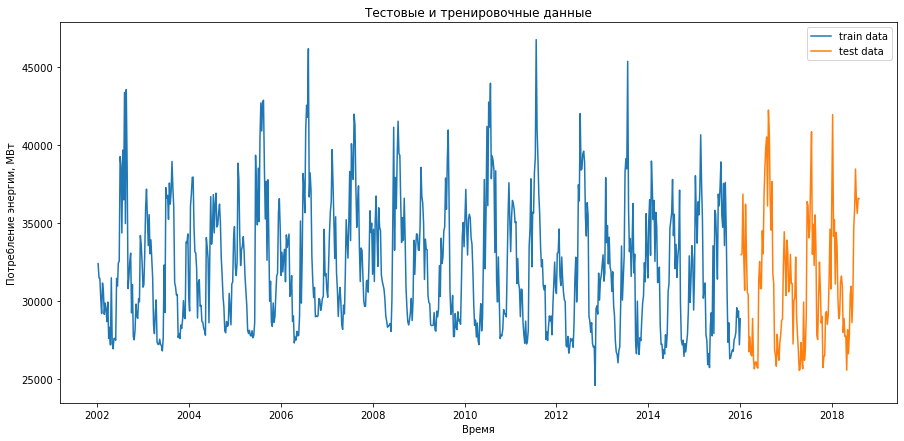

In [37]:
train, test = split_data( data_w, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [38]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [39]:
train.shape

(731, 52)

**5. Построение модели**

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
#Все модели возьмем в варианте параметров по умолчанию, кроме глубины деревьев.
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [41]:
print(X_test.shape)
y_test_pred_g = model_g.predict(X_test)

(121, 9)


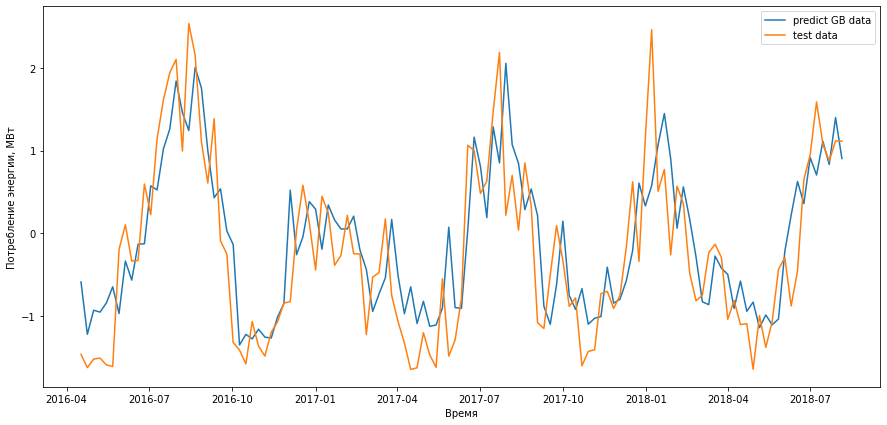

In [42]:

plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

**6. Оценки для сравнения моделей**

- средне-квадратичное отклонение
- среднюю абсолютную ошибку
- коэфиициент детерминации 


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.40446855770101653 
ошибка mae  :   0.5080871727647873 
оценка R2 :   0.6248428341882587


In [44]:
#Абсолютная процентная ошибка (MAPE).Обратите внимание, что определять ее для масштабированной переменной не верно. 
#Поэтому переведем ответ решателя обратно в состояние без масштаба.
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [45]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.563314310120203 %


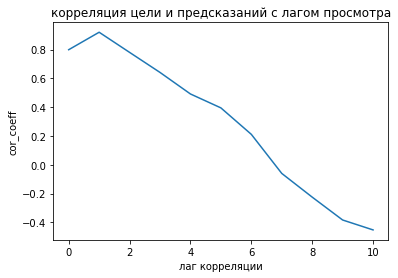

In [46]:
#Анализ на отсутствие корреляции с последующим ответом (проверяем не делаем ли предсказание в стиле "завтра==сегодня")
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция цели и предсказаний с лагом просмотра')
plt.show()

Поскольку самое большое значение корреляции не с первым ответом, то не все хорошо.

Ошибка неплоха, но мы имеем дело с маленьким горизонтом прогноза и тем неменее пока точность предсказания не превышает 90%. 
Построим более точную модель с использованием поиска моделей. Воспользуемся методом поиска 

In [47]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,10,14,5], 
              "n_estimators":[100,200,300,400,500, 1000, 1200,1500]}

#  randomized search
n_iter_search = 30

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.651 (std: 0.058)
Parameters: {'n_estimators': 100, 'max_depth': 2}

Model with rank: 2
Mean validation score: 0.635 (std: 0.061)
Parameters: {'n_estimators': 200, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.619 (std: 0.058)
Parameters: {'n_estimators': 300, 'max_depth': 2}



Выбираем модель с рангом 3. {'n_estimators': 100, 'max_depth':3} (в одном из запусков RandomizedSearchCV был лучший резльтат) и проведем ее обучение на тренировочном наборе.

In [48]:
model_g_best = GradientBoostingRegressor(max_depth=3,  n_estimators=100)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.575779289052493 %


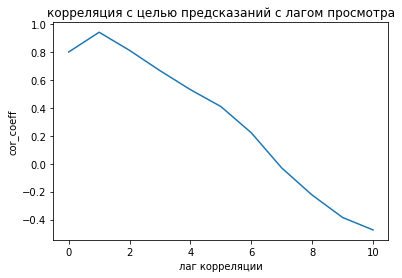

In [49]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

По корреляциям результат не идеальный , но приемлемый.
Качество решения задачи по MAPE повысилось почти на 0.07%. Очевидно, что диапазон вариаций значений был довольно узким. Провели всего 30 итераций поиска, что также не позволяет гарантировать идеальный ответ. Однако даже в такой версии за несколько минут поиска удается улучшить результат исходной модели. 

In [50]:
import pickle
# save the model to disk
filename = 'final_model.sav'
pickle.dump(model_g_best, open(filename, 'wb'))

filename = 'final_scaler_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))

ЗАДАНИЕ 2

Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

Все этапы такие же как и для построения предыдущей модели и не указаны поэтому.

In [51]:
#Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1) 
#Целевой признак
scl_target=StandardScaler() 
# p = 13
h=4
target = data_w['PJME_MW'].values[h+p:].reshape((data_w.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(849, 1)

In [52]:
#Входные признаки
scl_x=StandardScaler() 

X = data_w.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(849, 52)

In [53]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=0.53,  I=0
F-test=0.01,  I=1
F-test=0.00,  I=2
F-test=0.01,  I=3
F-test=0.01,  I=4
F-test=0.01,  I=5
F-test=0.01,  I=6
F-test=0.04,  I=7
F-test=0.03,  I=8
F-test=0.04,  I=9
F-test=0.04,  I=10
F-test=0.01,  I=11
F-test=0.05,  I=12
F-test=0.00,  I=13
F-test=0.00,  I=14
F-test=0.10,  I=15
F-test=0.10,  I=16
F-test=0.54,  I=17
F-test=0.35,  I=18
F-test=0.28,  I=19
F-test=0.04,  I=20
F-test=0.07,  I=21
F-test=0.18,  I=22
F-test=0.37,  I=23
F-test=0.43,  I=24
F-test=0.48,  I=25
F-test=0.28,  I=26
F-test=0.49,  I=27
F-test=0.73,  I=28
F-test=0.93,  I=29
F-test=1.00,  I=30
F-test=0.95,  I=31
F-test=0.66,  I=32
F-test=0.43,  I=33
F-test=0.20,  I=34
F-test=0.05,  I=35
F-test=0.00,  I=36
F-test=0.05,  I=37
F-test=0.23,  I=38
F-test=0.07,  I=39
F-test=0.04,  I=40
F-test=0.03,  I=41
F-test=0.01,  I=42
F-test=0.00,  I=43
F-test=0.00,  I=44
F-test=0.02,  I=45
F-test=0.03,  I=46
F-test=0.07,  I=47
F-test=0.11,  I=48
F-test=0.13,  I=49
F-test=0.14,  I=50
F-test=0.12,  I=51


In [54]:
#Применим автоматизацию выбора через SelectKBest c выделением 7 лучших признаков.
sfk =SelectKBest(f_regression, k=7)
X_new1 =sfk.fit_transform(X, y.ravel())
print(X_new1.shape)
column_names = data_w.columns[sfk.get_support()]
print(column_names)

(849, 7)
Index(['PJME_MW', 'diff1_l', 't11', 't10', 't9', 't8', 't7'], dtype='object')


In [55]:
#Лучшее множество признаков отделено в X_new1. Проверим результат оценки признаков по процентному отбору и 
#сохраним его в X_new2.
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
print(X_new2.shape)
column_namesp = data_w.columns[sfp.get_support()]
print(column_namesp)

(849, 6)
Index(['diff1_l', 't11', 't10', 't9', 't8', 't7'], dtype='object')


In [56]:
#Третий вариант - применим выделение признаков через построение модели. Помним, что модель должна уметь выбрать 
#подмножество признаков или вернуть коэффициент их влиятельности. Это ограничивает выбор моделей. 
#Возьмем как оценшик GradientBoostingRegressor и построим новое пространство в X_new3
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 7)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(849, 7)

In [57]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 17 28 29 30 31 32]
Номера признаков лучших признаков по процентной форме:  [17 28 29 30 31 32]
Номера признаков для выбора по модели :  [ 0  4  5 11 25 29 31]


In [58]:
list_par=[0,4,5,11,17,25,31,32,33,34,35]
X_new = X[:,list_par]
data_w.columns[list_par]

Index(['PJME_MW', 'dayofyear', 'weekofyear', 'pca1', 'diff1_l', 'exp_0_8',
       't8', 't7', 't6', 't5', 't4'],
      dtype='object')

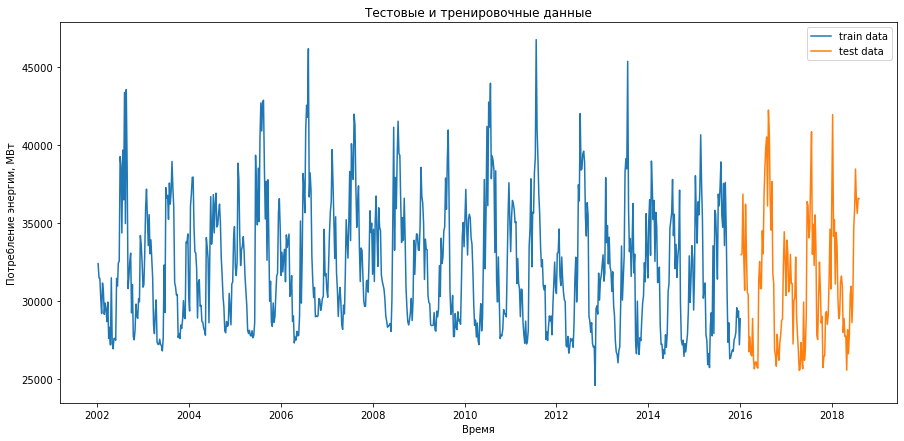

In [59]:
train, test = split_data( data_w, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [60]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]
train.shape

(731, 52)

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
#Все модели возьмем в варианте параметров по умолчанию, кроме глубины деревьев.
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [62]:
print(X_test.shape)
y_test_pred_g = model_g.predict(X_test)

(118, 11)


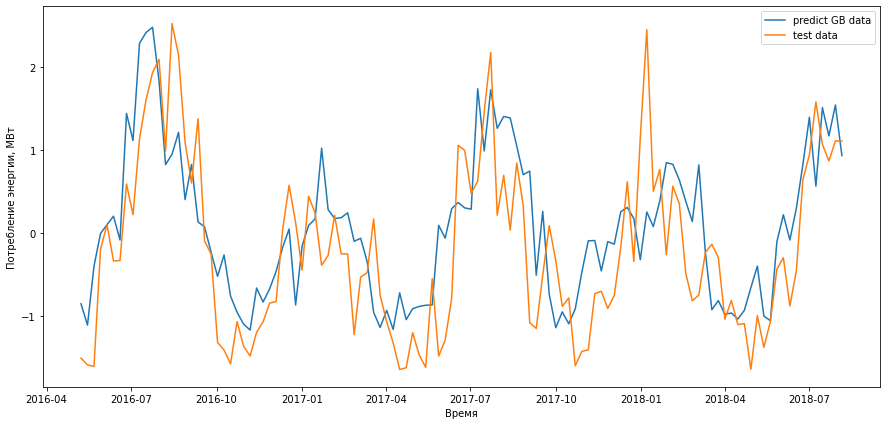

In [63]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.557013336888256 
ошибка mae  :   0.6070884686066208 
оценка R2 :   0.4748572845268626


In [65]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.852546455214708 %


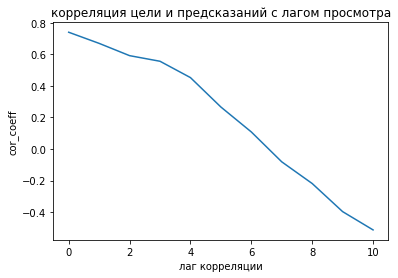

In [66]:
#Анализ на отсутствие корреляции с последующим ответом (проверяем не делаем ли предсказание в стиле "завтра==сегодня")
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция цели и предсказаний с лагом просмотра')
plt.show()

Ошибка неплоха, но мы имеем дело с маленьким горизонтом прогноза и тем неменее пока точность предсказания не превышает 70%. 
Построим более точную модель с использованием поиска моделей. Воспользуемся методом поиска 

In [67]:
param_dist = {"max_depth": [3, 2,10,14,5], 
              "n_estimators":[100,200,300,400,500, 1000, 1200,1500]}

#  randomized search
n_iter_search = 30

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.604 (std: 0.097)
Parameters: {'n_estimators': 200, 'max_depth': 2}

Model with rank: 2
Mean validation score: 0.600 (std: 0.093)
Parameters: {'n_estimators': 300, 'max_depth': 2}

Model with rank: 3
Mean validation score: 0.599 (std: 0.104)
Parameters: {'n_estimators': 100, 'max_depth': 2}



Выбираем модель с рангом 3. {'n_estimators': 100, 'max_depth':3} (в одном из запусков RandomizedSearchCV был лучший резльтат) и проведем ее обучение на тренировочном наборе.

In [68]:
model_g_best = GradientBoostingRegressor(max_depth=3,  n_estimators=100)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.760339356591607 %


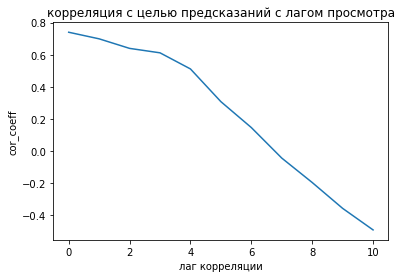

In [69]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

По корреляциям результат не идеальный , но приемлемый.
Качество решения задачи по MAPE повысилось почти на 0.18%. Очевидно, что диапазон вариаций значений был довольно узким. Провели всего 30 итераций поиска, что также не позволяет гарантировать идеальный ответ. Однако даже в такой версии за несколько минут поиска удается улучшить результат исходной модели. 

In [70]:
# save the model to disk
filename = 'final_model_h4.sav'
pickle.dump(model_g_best, open(filename, 'wb'))

filename = 'final_scaler_y_h4.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_x_h4.sav'
pickle.dump(scl_x, open(filename, 'wb'))

**Вывод** 

**При переходе от модели предсказания 1-й точки от текущей (h = 1) к модели предсказания 4-й точки от текущей (h = 4), ошибка градиентного бустинга MAPE :   увеличилась с 6.575779289052493    %  до 7.760339356591607      % что приемлемо.**



ЗАДАНИЕ 4

Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек. 

In [71]:
test.columns[17]

'diff1_l'

In [72]:
X_test.shape[0]

118

In [73]:
p

13

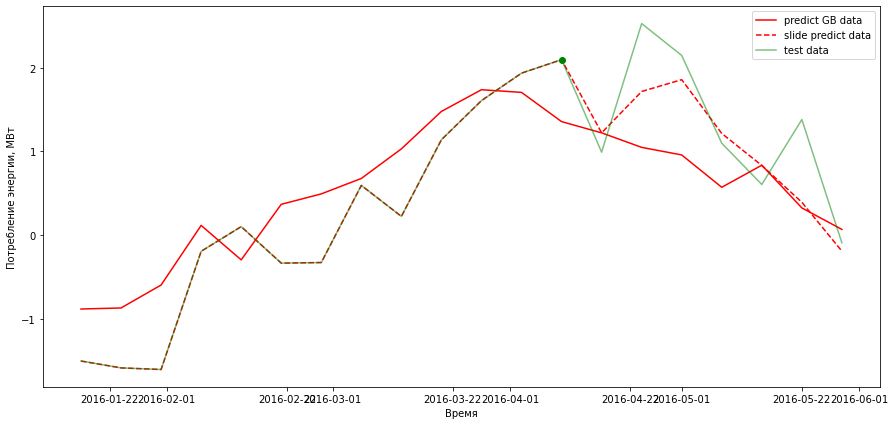

In [74]:
# ['PJME_MW', 'dayofyear', 'weekofyear', 'pca1', 'diff1_l', 'exp_0_8', 't11', 't10', 't9', 't8', 't7']
X_test_100 = X_test.copy()
y_test_100 = y_test.copy()
N = 20
for i in range(p,N+p):
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,X_test_100.shape[1])))
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )
                                     
    # заполняем вектор для прогноза следующей точки
    X_test_100[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]
    
     
    #строим 'diff1_l' - признак под номером 4
    # строим логарифм по значению ряда и скалируем признак по схеме 17-го признака из основного списка
    xy_i=(np.log((y_i))-scl_x.mean_[17])*scl_x.scale_[17]
    #устанавливаем новое значение для 4
    X_test_100[i+1,4] = xy_i 
    # обновим историю значенний
    X_test_100[i+1,5] = X_test_100[i,5]*(1-0.08)+ 0.08 * X_test_100[i+1,0] 

    X_test_100[i+1,6] = X_test_100[i-11,0]    
    X_test_100[i+1,7] = X_test_100[i-10,0]
    X_test_100[i+1,8] = X_test_100[i-9,0]
    X_test_100[i+1,9] = X_test_100[i-8,0]
    X_test_100[i+1,10] = X_test_100[i-7,0]       

plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N+1],y_test_pred_g[:N], 'r',label='predict GB data' )
plt.plot(test.index[1:N+1],y_test_100[:N], '--r',label='slide predict data')
plt.plot(test.index[1:N+1],y_test[:N], 'g',label='test data', alpha=0.5)
plt.plot(test.index[p],y_test[p-1], 'og', alpha=1)
plt.legend()
plt.show()    

In [75]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[p:N]),y_pred = scl_target.inverse_transform( y_test_100[p:N]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   4.108624997153404 %


**Результат(ошибка MAPE) в 4-й точке путем прямого моделирования=7.760339356591607   %
Результат(ошибка MAPE) путем рекурсивного моделирования на длине выборки из 4-х точек=4.108624997153404  %
Т.е. значительно лучше - почти в 2 раза


ЗАДАНИЕ 5

Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10*i-й до (i+1)*10 -й,... ,от 90 до 100-й точках (используйте осреденение по десяткам точек)

In [76]:
def recursive_model(p,N1,N2,X_test_1,y_test_1):
    er_gs=[]
    for N in range(N1,N2+1):  
        for i in range(p,N+p):
            y_test_1[i] = model_g_best.predict(X_test_1[i,:].reshape((1,X_test_1.shape[1])))
            # восстанавливаем не масштабированное значение ряда текущей точке  
            y_i=scl_target.inverse_transform(y_test_1[i:i+1]  )
                                     
            # заполняем вектор для прогноза следующей точки
            X_test_1[i+1,0] = (y_i-scl_x.mean_[0])/scl_x.scale_[0]    
     
            #строим 'diff1_l' - признак под номером 4
            # строим логарифм по значению ряда и скалируем признак по схеме 17-го признака из основного списка
            xy_i=(np.log((y_i))-scl_x.mean_[17])*scl_x.scale_[17]
            #устанавливаем новое значение для 4
            X_test_1[i+1,4] = xy_i 
            # обновим историю значенний
            X_test_1[i+1,5] = X_test_100[i,5]*(1-0.08)+ 0.08 * X_test_1[i+1,0] 

            X_test_1[i+1,6] = X_test_1[i-11,0]    
            X_test_1[i+1,7] = X_test_1[i-10,0]
            X_test_1[i+1,8] = X_test_1[i-9,0]
            X_test_1[i+1,9] = X_test_1[i-8,0]
            X_test_1[i+1,10] = X_test_1[i-7,0]  
        
        er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[p:N]),y_pred = scl_target.inverse_transform( y_test_1[p:N]))
        
        er_gs.append(er_g)
    print(f'ошибка градиентного бустинга MAPE от {N1-13} до {N2-13}:  ', np.mean(er_gs),'%')
     
   

In [85]:
X_test_1 = X_test.copy()
y_test_1 = y_test.copy()

map_arr=[(1,14,23),(2,24,33),(3,33,43),(4,44,53),(5,54,63),(6,64,73),(7,74,83),(8,84,93),(9,94,103)]
np.argsort(map_arr)
for elem in map_arr:
    el_num,N1,N2=elem
    recursive_model(p,N1,N2,X_test_1,y_test_1)

ошибка градиентного бустинга MAPE от 1 до 10:   4.25814255420542 %
ошибка градиентного бустинга MAPE от 11 до 20:   6.634303034204767 %
ошибка градиентного бустинга MAPE от 20 до 30:   6.288669879102883 %
ошибка градиентного бустинга MAPE от 31 до 40:   6.5864396800780245 %
ошибка градиентного бустинга MAPE от 41 до 50:   6.7840669263750275 %
ошибка градиентного бустинга MAPE от 51 до 60:   6.996878120326623 %
ошибка градиентного бустинга MAPE от 61 до 70:   6.973253263019863 %
ошибка градиентного бустинга MAPE от 71 до 80:   6.840578473893663 %
ошибка градиентного бустинга MAPE от 81 до 90:   6.988440979868893 %


**Вывод - ошибка возрастает при увеличении горизонта прогнозирования, но не сильно и неравномерно, примерно на 60% от первых десяти точек до последних десяти точек сотни - от 4.258%  до примерно 7%**

ЗАДАНИЕ 6

Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.

**Поведение ошибки предсказания ряда -сама ошибка уменьшилась (на такую же глубину прогнозирования),
но по мере увеличения горизонта прогнозирования увеличение ошибки происходит не сильно и неравномерно, на 100 точек горизонта прогнозирования ошибка увеличивается чуть меньше чем вдвое - это хороший результат.**